In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from PIL import ImageGrab

# Question-1

In [4]:
ImageGrab.grabclipboard()

# Conducting a 2-tailed t-Test on 2 Independent samples with Numerical Data
## We need to check whether the mean of both samples are different
## Is there any significance difference between the two samples

### Step-1
#### Make two Hypothesis one contradicting to other
#### Null Hypothesis is what we want to prove
##### 1. Null Hypothesis: μ1 = μ2
##### 2. Alternative Hypothesis: μ1 ≠ μ2

### Step-2
#### Deciding a cut-off value
##### 1. Significance 5%
##### 2. alpha=0.05
#### As it is two-tailed test
##### alpha/2=0.025

### Step-3
#### Collect Evidence

In [5]:
#Import data
cutlets = pd.read_csv("Cutlets.csv")
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [6]:
#Applying Descriptive Statistics
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [7]:
#checking for null values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [8]:
#checking for duplicate values
cutlets[cutlets.duplicated()].shape

(0, 2)

In [9]:
#checking the data type
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


## Plotting the Data

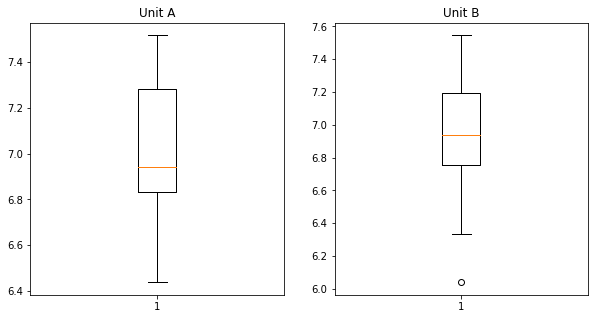

In [10]:
#Boxplot

plt.subplots(figsize = (10, 5))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')

plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

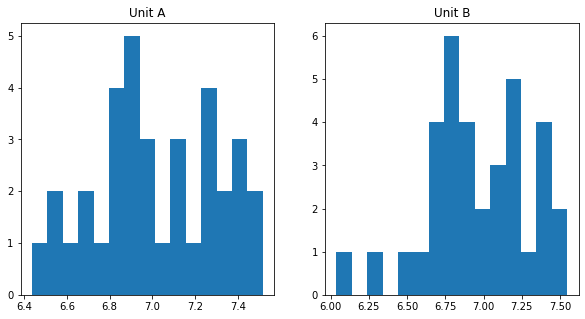

In [11]:
#histogram

plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')

plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')

plt.show()

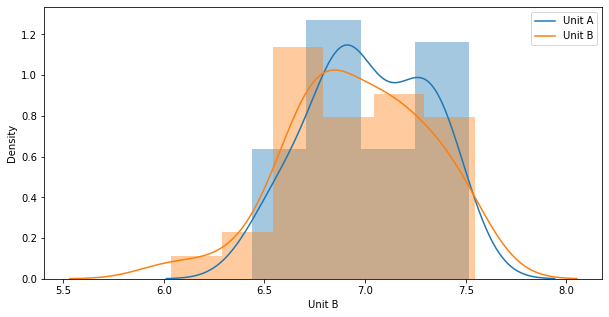

In [12]:
#Distribution plot

plt.figure(figsize = (10, 5))
label = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'], hist = True)
plt.legend(label)
plt.show()

## Plotting the Q-Q plot to check whether the distribution follows normal distribution or not

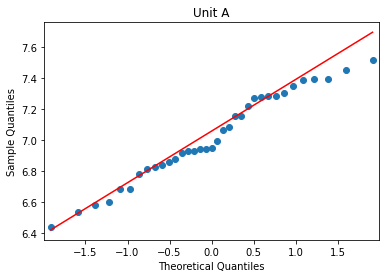

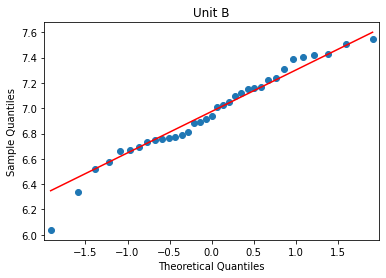

In [13]:
sm.qqplot(cutlets['Unit A'], line = 'q')
plt.title('Unit A')

sm.qqplot(cutlets['Unit B'], line = 'q')
plt.title('Unit B')

plt.show()

### Step-4
#### Compare Evidences with Hypothesis using t-statistics

In [14]:
statistic, p_value = stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'], alternative = 'two-sided')
print('p_value = ', p_value)

p_value =  0.4722394724599501


#### Compare p_value with 'α' 
#### 1. if p_value is ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence
#### 2. if p_value = 'α' we reject Null Hypothesis

In [15]:
alpha = 0.025
print('significance = %.3f, p = %.3f' % (alpha, p_value))

if(p_value <= alpha):
    print('We reject Null Hypothesis')
else:
    print('We failed to reject Null Hypothesis')

significance = 0.025, p = 0.472
We failed to reject Null Hypothesis


## Hence, We failed to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# Question-2

In [16]:
ImageGrab.grabclipboard()

## Conducting ANOVA Test on 4 Independent samples with Numerical Data
### We need to check whether the mean of any of these samples are different or the same?

### Step-1
#### Make two Hypothesis one contradicting to other
#### Null Hypothesis is needed to prove
##### 1. Null Hypothesis: μ1 = μ2 = μ3 = μ4
##### 2. Alternative Hypothesis: Atleast once of them is different

### Step-2
#### Deciding a cut-off value
##### 1. Significance 5%
##### 2. alpha = 0.05

### Step-3
#### Collect evidence

In [17]:
#Importing Data
tat = pd.read_csv('LabTAT.csv')
tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
#Applying Desciptive Statistics
tat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [19]:
#checking for null values
tat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [20]:
#checking for duplicates
tat[tat.duplicated()].shape

(0, 4)

In [21]:
#checking data type
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


## Plotting the data

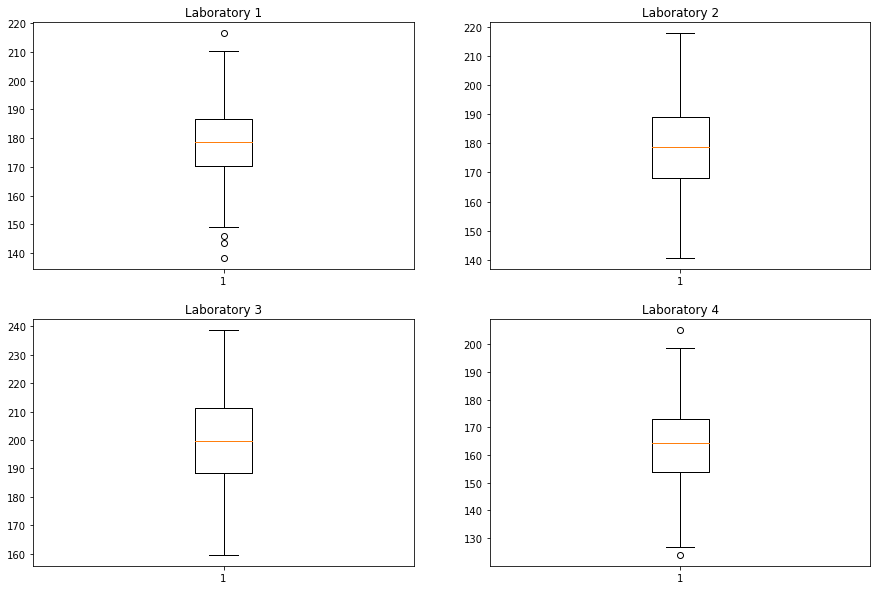

In [22]:
#Boxplot

plt.subplots(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.boxplot(tat['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(2, 2, 2)
plt.boxplot(tat['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(2, 2, 3)
plt.boxplot(tat['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(2, 2, 4)
plt.boxplot(tat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

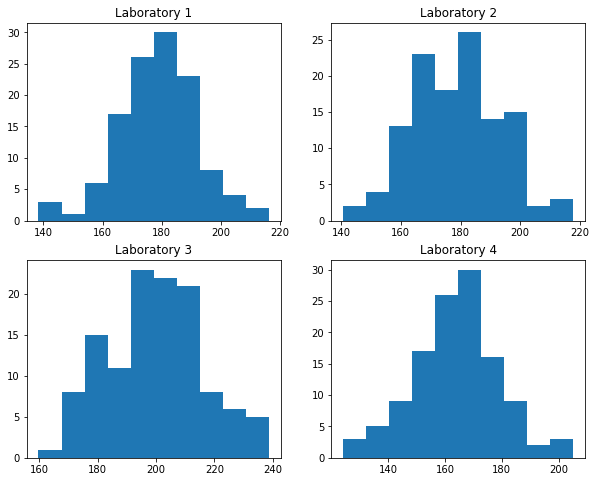

In [23]:
#histogram

plt.subplots(figsize = (10, 8))
plt.subplot(221)
plt.hist(tat['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(222)
plt.hist(tat['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(223)
plt.hist(tat['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(224)
plt.hist(tat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

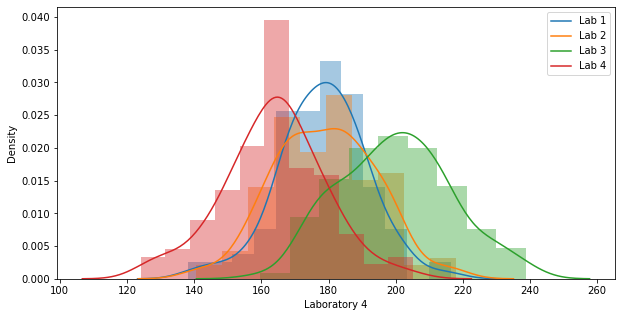

In [24]:
#Distribution plot

plt.figure(figsize = (10, 5))
labels = ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4']
sns.distplot(tat['Laboratory 1'], kde = True)
sns.distplot(tat['Laboratory 2'], hist = True)
sns.distplot(tat['Laboratory 3'], hist = True)
sns.distplot(tat['Laboratory 4'], hist = True)
plt.legend(labels)
plt.show()

## Plotting Q-Q plot to check whether the distribution follows normal distribution or not

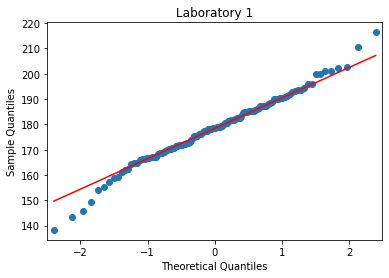

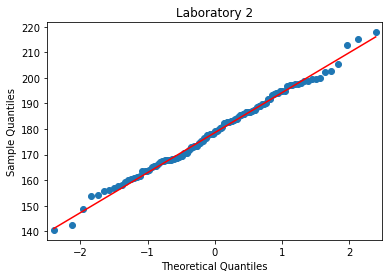

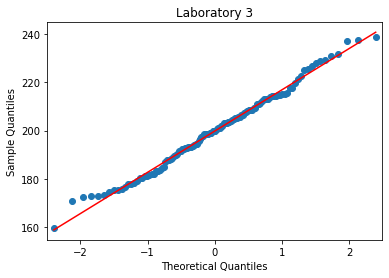

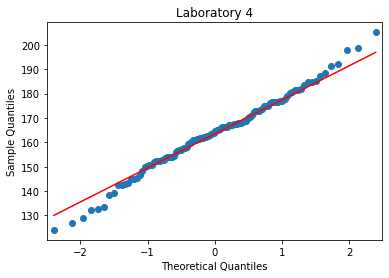

In [25]:
sm.qqplot(tat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')

sm.qqplot(tat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')

sm.qqplot(tat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')

sm.qqplot(tat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

### Step-4
#### Compare Evidences with Hypothesis using t-statistic

In [26]:
test_statistic, p_value = stats.f_oneway(tat.iloc[:, 0], tat.iloc[:, 1], tat.iloc[:, 2], tat.iloc[:, 3])
print('p_value = ', p_value)

p_value =  2.1156708949992414e-57


#### Compare p_value with 'α'
#### if p_value is ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence
#### if p_value is = 'α' we reject Null Hypothesis

In [27]:
alpha = 0.05
print('Significance = %.3f, p_value = %.3f' % (alpha, p_value))
if(p_value <= alpha):
    print('We reject Null Hypothesis')
else:
    print('We failed to reject Null Hypothesis')

Significance = 0.050, p_value = 0.000
We reject Null Hypothesis


## Hence, we fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the samples

# Question-3

In [28]:
ImageGrab.grabclipboard()

## Conducting a Test of Indepencence using Chi-Square χ2 test with Contingency table
### We need to check whether the proportion of any of these samples are different or the same?

### Step-1
#### Make two Hypothesis one contradicting to other
#### Null Hypothesis is needed to prove
##### 1. Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions
##### 2. Alternative Hypothesis: There is significant association or dependency between the gender based buyer rations across regions

### Step-2
#### Deciding a cut-off value
##### 1. Significance 5%
##### 2. alpha = 0.05
#### As it is a one-tailed test
##### 1. alpha = 1-0.95 = 0.05

### Step-3
#### Collect evidence


In [29]:
#Importing Data
buyer = pd.read_csv('BuyerRatio.csv', index_col=0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [30]:
table = [[50, 142, 131, 70], [435, 1523, 1356, 750]]

In [31]:
# Applying Chi-Square χ2 contingency table to convert observed value into expected value
stat, p, dof, exp = stats.chi2_contingency(buyer) 
print(stat, "\n", p, "\n", dof, "\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [32]:
stats.chi2_contingency(table)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [33]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

### Step-4
#### Comparing evidence with Hypothesis


In [34]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ", statistics, "\n", 'p_value = ', p_value)

Statistics =  1.5959455390914483 
 p_value =  0.8095206646905712


#### Compare p_value with 'α'
#### if p_value is ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence
#### if p_value is = 'α' we reject Null Hypothesis

In [35]:
alpha = 0.05
print('Significace = %.3f, p_value = %.3f' % (alpha, p_value))
if(p_value <= alpha):
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null Hypothesis')

Significace = 0.050, p_value = 0.810
We fail to reject Null Hypothesis


## We fail to reject Null Hypothesis because of lack of evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# Question-4 

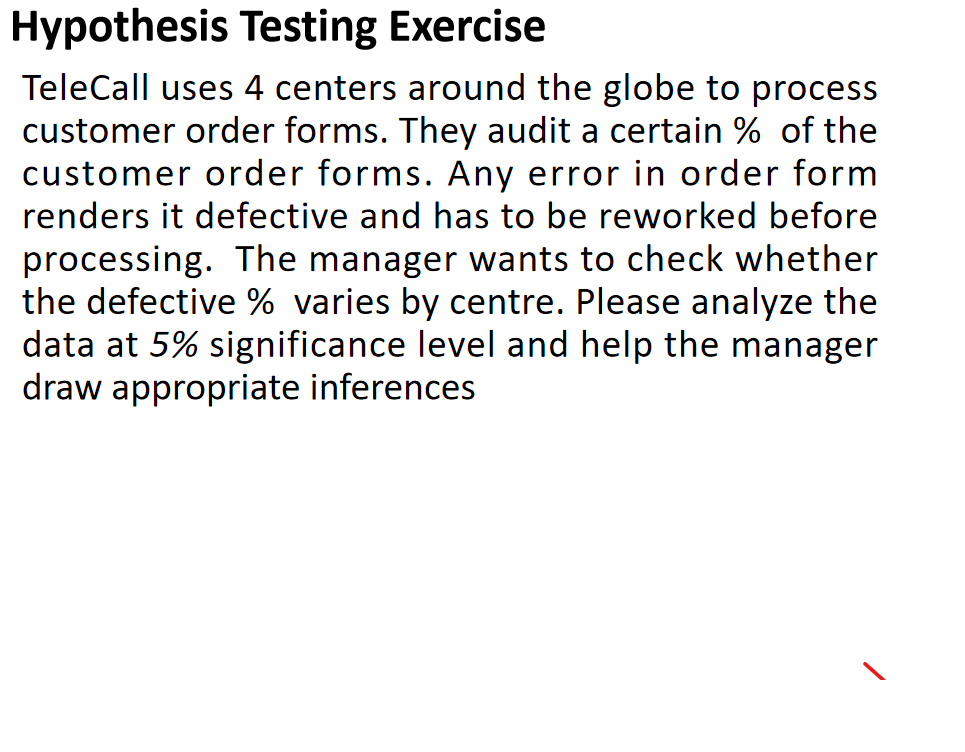

In [36]:
ImageGrab.grabclipboard()

## Conducting a Test of Independence using Chi-Square χ2 test with contingency table
### We need to check whether the mean of any of these samples are same or different?

### Step-1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is needed to prove
##### 1. Null Hypothesis: μ1 = μ2 = μ3 = μ4
##### 2. Alternative Hypothesis: Atleast one of them is different

### Step-2
#### Deciding a cut-off value
##### 1. Significance 5%
##### 2. alpha = 0.05

### Step-3
#### Collect evidence

In [37]:
# Importing data
centers = pd.read_csv('Costomer+OrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [38]:
#Applying Descriptive Statistics
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [39]:
#checking null values
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [40]:
#checking the data type
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [42]:
#checking the value counts in data
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [45]:
#creating contingency table
contingency_table = [[272, 267, 269, 280], [29, 33, 31, 20]]
print(contingency_table)

[[272, 267, 269, 280], [29, 33, 31, 20]]


In [46]:
#calculating expected values for observed data
stat, p, dof, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ", stat, '\n', "p_value = ", p, '\n', "degree of freedom = ", dof, '\n', 'Expected Values = ', exp)

Statistics =  3.856522586267477 
 p_value =  0.2773797059414673 
 degree of freedom =  3 
 Expected Values =  [[272.67943381 271.77352206 271.77352206 271.77352206]
 [ 28.32056619  28.22647794  28.22647794  28.22647794]]


In [47]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

### Step-4
#### Compare evidences with Hypothesis using t-statistic

In [48]:
test_statistic, p_value = stats.chisquare(observed, expected, ddof = dof)
print("Test Statistic = ", test_statistic, '\n', 'p_value = ', p_value)

Test Statistic =  3.858960685820355 
 p_value =  0.4254298144535761


#### Compare p_value with 'α'
#### if p_value is ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence
#### if p_value is = 'α' we reject Null Hypothesis

In [49]:
alpha = 0.05
print('Significance = %.3f, p = %.3f' % (alpha, p_value))
if(p_value <= alpha):
    print('We reject Null Hypothesis')
else:
    print('We failed to reject Null Hypothesis')

Significance = 0.050, p = 0.425
We failed to reject Null Hypothesis


## We fail to reject Null Hypothesis because of lack of evidence